In [7]:
from netCDF4 import Dataset
import numpy as np
import pandas as pd
from pyproj import Proj, CRS, transform
import matplotlib
import sys
sys.path.append('/home/ZhiLi/CRESTHH')
from cresthh.anuga import SWW_plotter

In [25]:
sploter= SWW_plotter('Aug_Sep_coupled_refined_channel.sww', start_time=pd.to_datetime('20170825000000'))

Figure files for each frame will be stored in _plot


In [ ]:
for i, time in enumerate(sploter.time):
    if i%15==0:
        sploter.save_soil_frame(frame=i)
    else:
        pass

In [9]:
myProj = Proj("+proj=utm +zone=15, +south +ellps=WGS84 +datum=WGS84 +units=m +no_defs")
xc= sploter.xc
yc= sploter.yc
# initialize water depth
origin= (-95.43666, 30.11085)
origin_utm= myProj(origin[0],origin[1])
iloc= np.argmin( (xc-origin_utm[0])**2 + (yc-origin_utm[1])**2 )
# second= (-95.646063,30.11935)
# second_utm= myProj(second[0],second[1])
# dist= ((origin_utm[0]-second_utm[0])**2+ (origin_utm[1]-second_utm[1])**2)

In [10]:

OBS= pd.read_csv('/home/ZhiLi/CRESTHH/data/streamGauge/08068500.txt', delimiter='\t',
                 names=['USGS','ID','date','TZ','Q',' ','H',' '], converters={'date':pd.to_datetime}).set_index('date')
OBS.index= OBS.index.tz_localize('US/Central').tz_convert('UTC').tz_localize(None)
obs= OBS.resample('120S', label='right').mean().interpolate()
stage= sploter.stage[:,iloc]

In [14]:
period= pd.date_range('20170825', '20170901', freq='120S')

In [12]:
len(stage)

5041

In [15]:
len(period)

5041

In [18]:
df= pd.DataFrame(index= period)
df['sim']= sploter.stage[:,iloc]
df['obs']= obs.loc[period].H*0.306

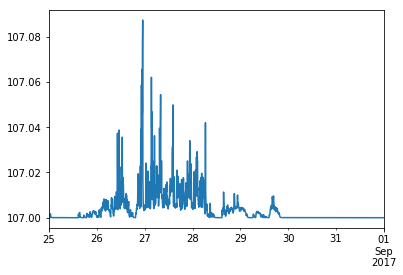

In [21]:
df.sim.plot()

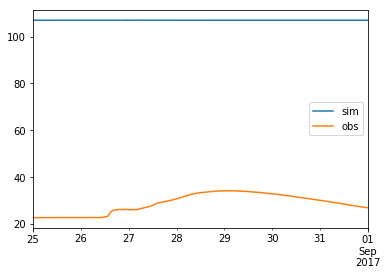

In [19]:
df.plot()